# Calculating Protein Cation Pi Bonds

We identify cation pi bonds for a protein in 150 mmol NaCl.

The Sequence is 

In [5]:
from cation_pi_analysis import CationPiBondAnalysis
import MDAnalysis as mda
import matplotlib.pyplot as plt
import os

In [13]:
out_path = f'{os.getcwd()}/cation_pi_analysis_demo_out'
if os.path.exists(out_path) == False:
    os.mkdir(out_path)

In [20]:
project_path = f"{os.getcwd()}/demo_trajectory"
psf_in=f'{project_path}/ionized.psf'
dcd_in=f'{project_path}/output.dcd'
u = mda.Universe(psf_in, dcd_in, in_memory=True)

In [21]:
cation_pi_bonds = CationPiBondAnalysis(
    universe=u,
    pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)",
    cations_sel="(resname LYS and name NZ) or (resname ARG and name CZ)",
    c_p_cutoff=5.0,
    update_selections=True
)

In [22]:
cation_pi_bonds.run(verbose=True,
                         start=None,
                         stop=None,
                         step=10)

  0%|          | 0/600 [00:00<?, ?it/s]

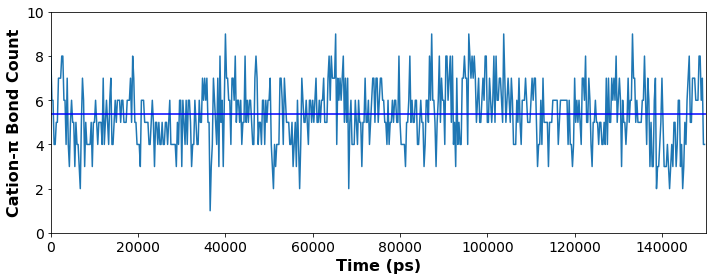

In [26]:
fig = plt.figure(figsize=([10,4]))
plt.plot(cation_pi_bonds.times, cation_pi_bonds.results['cation_pi_bonds'])
plt.axhline(y=sum(cation_pi_bonds.results['cation_pi_bonds'])/len(cation_pi_bonds.results['cation_pi_bonds']),label=None,c='blue')
plt.xlabel('Time (ps)',fontweight='bold',fontsize=16)
plt.ylabel(f'Cation-\u03C0 Bond Count',fontweight='bold',fontsize=16)
plt.ylim([0,10])
plt.xlim([0,150000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f'{out_path}/cation_pi_150ns_plot.jpeg')
plt.show()